# Project 9 - Social Networks and Recommendation Systems

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

#### 9.1 Find the analytical formula of the ergodic density for random walk on a graph given by adjacency matrix A with Markov operator P

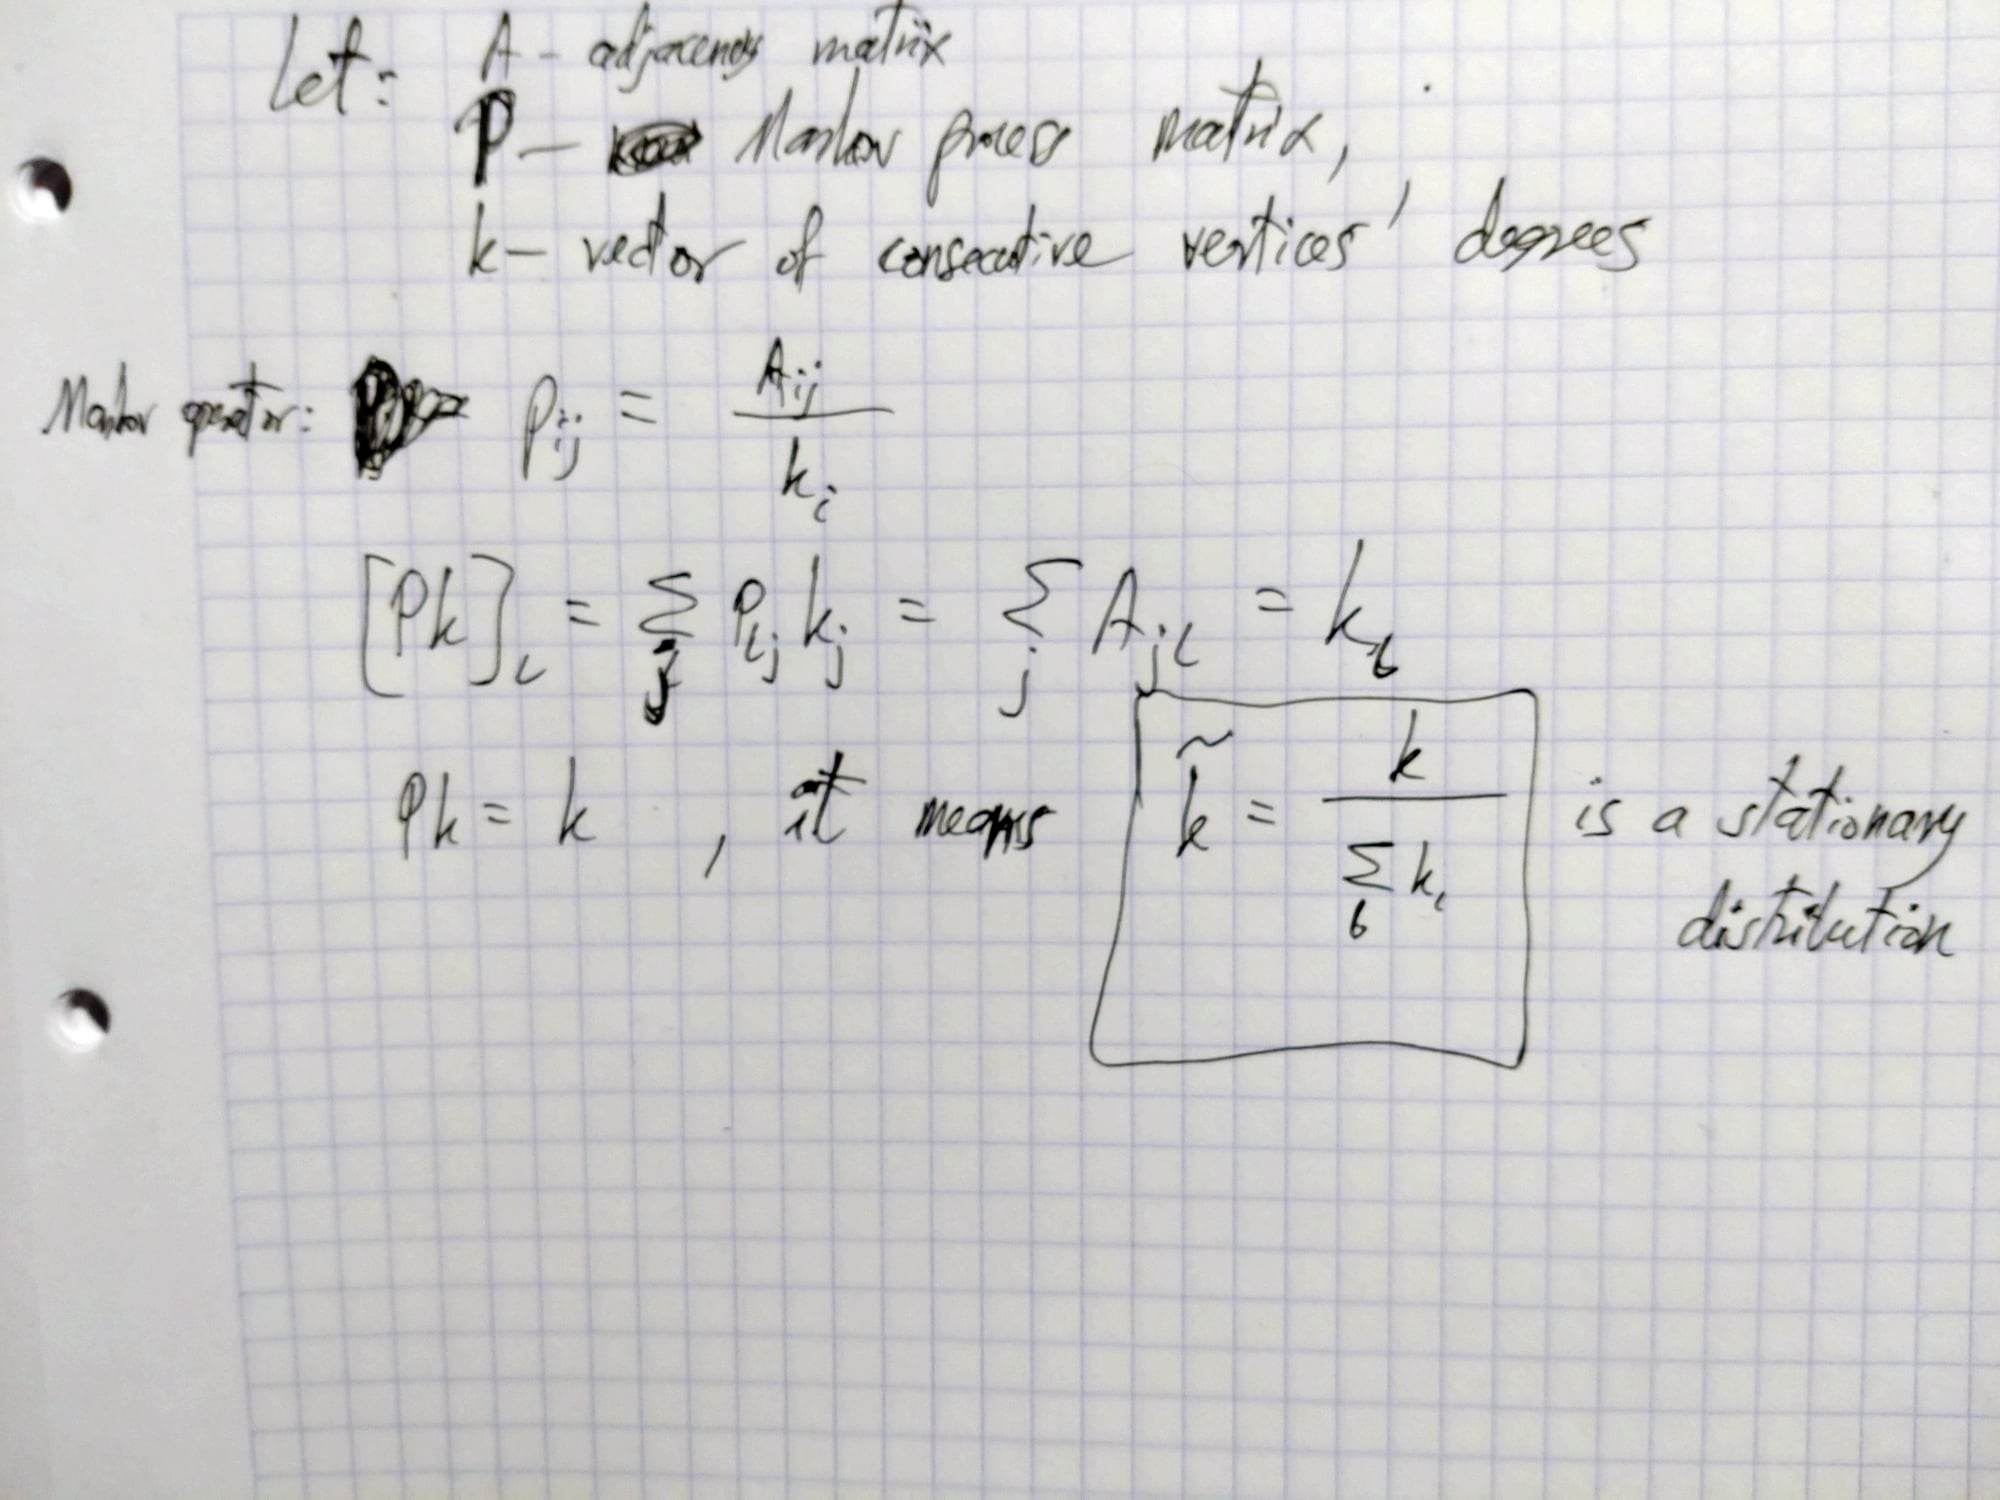

In [61]:
from IPython.display import Image
Image(filename='exercice9_1.jpg', width = 600) 

#### 9.2 Determine numerically (looking for the eigenvector) values of ergodic density for the random walk on selected network. [

In [6]:
def generate_stochastic_matrix(N: int) -> np.array:
    M = np.random.rand(N, N)
    for _ in range(np.random.randint(0, N*N)):
        M[np.random.randint(0, N), np.random.randint(0, N)] = 0
    M = M/M.sum(axis=0)
    return M
M = generate_stochastic_matrix(6)
M.round(3)

array([[0.103, 0.07 , 0.039, 0.15 , 0.306, 0.148],
       [0.153, 0.264, 0.28 , 0.206, 0.249, 0.193],
       [0.234, 0.105, 0.352, 0.083, 0.155, 0.221],
       [0.259, 0.221, 0.27 , 0.124, 0.05 , 0.048],
       [0.01 , 0.316, 0.058, 0.296, 0.217, 0.237],
       [0.24 , 0.024, 0.   , 0.141, 0.022, 0.153]])

In [14]:
eigenvalues, eigenvec = scipy.linalg.eig(M)


eigenvec2 = np.real(eigenvec)

In [15]:
k_ = eigenvec2[: ,np.where(np.abs(eigenvalues - 1)<1e-14),]
k_ /= k_.sum()
np.round(k_, 2)

array([[[0.14]],

       [[0.23]],

       [[0.18]],

       [[0.17]],

       [[0.2 ]],

       [[0.08]]])

In [17]:
k_.sum() # is a density distribution, according to proven formula, it is an ergodic distribution

1.0

#### 9.3 Determine dynamically (by iterating the Markov operator) ergodic density for the random walk on selected network. 

In [20]:


M2 = M.copy()
for i in range(30):
    M2= np.dot(M2, M)
    M2 = M2/M2.sum(0)



In [21]:
np.round(M2, 2)

array([[0.14, 0.14, 0.14, 0.14, 0.14, 0.14],
       [0.23, 0.23, 0.23, 0.23, 0.23, 0.23],
       [0.18, 0.18, 0.18, 0.18, 0.18, 0.18],
       [0.17, 0.17, 0.17, 0.17, 0.17, 0.17],
       [0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 ],
       [0.08, 0.08, 0.08, 0.08, 0.08, 0.08]])

The ergodic density is the same as calculated by using eigen vectors.

#### 9.5  Determine the value of classic or modified pagerank for the selected network.

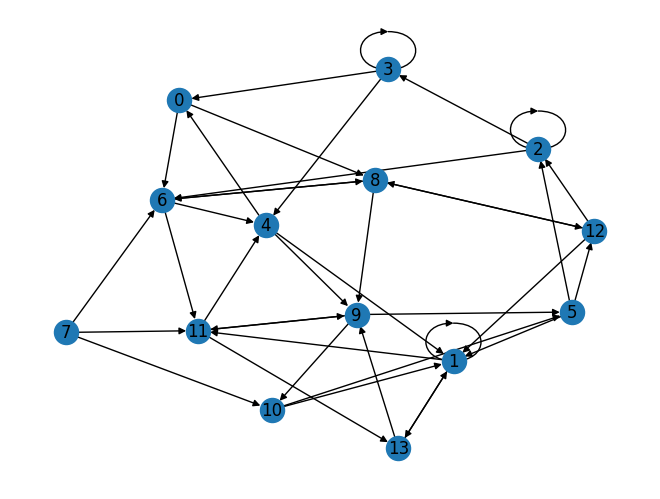

In [9]:
G = nx.DiGraph(nx.directed.random_uniform_k_out_graph(14, 3, 0.15, seed=44))
nx.draw_kamada_kawai(G, with_labels=True)

In [12]:
from copy import copy
class PageRankGraph:
    def __init__(self, G: nx.Graph, d:float=0.85, it:int =500): # d = 0.85, an arbitrary hyperparameter
        self.d = d
        self.it = it
        self.G = G
        
        aux = nx.linalg.adjacency_matrix(G).todense()
        self.A = aux / aux.sum(axis=1)
        self.PR = np.ones(len(G.nodes)).reshape(1, -1)
    def update_pageRank(self):
        self.PR =  self.PR @ self.A
        self.PR = self.PR/self.PR.sum()
        self.PR = self.d/len(self.PR) + (1-self.d)*self.PR
    def get_pageRank(self):
        for i in range(self.it):
            self.update_pageRank()
        return np.array(self.PR).reshape(-1)

In [13]:
pagerank = PageRankGraph(G).get_pageRank()
pagerank

C:\Users\patry\AppData\Local\Temp\ipykernel_11932\3388954972.py:8: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  aux = nx.linalg.adjacency_matrix(G).todense()


array([0.18853576, 0.29204043, 0.20743584, 0.18797756, 0.21324767,
       0.20041052, 0.23240553, 0.15      , 0.21774752, 0.24321315,
       0.18776623, 0.23813675, 0.19016207, 0.20092097])

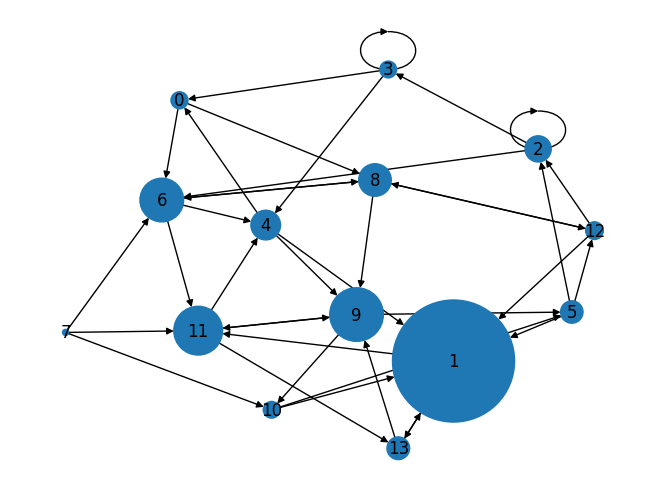

In [24]:
nx.draw_kamada_kawai(G, with_labels=True, node_size=(pagerank**9)*500000000)